In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [4]:
archivo_url = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/train.csv'

archivo = 'train.csv'

ds = pd.read_csv(archivo)

ds
    
    

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.792141,0.585212,-0.067640,0.999518,0.682632,0.539670,0.270455,0.996880,0.688922,...,-0.077094,0.957863,0.098083,0.716431,0.186286,0.685353,0.084355,0.724885,-0.230562,0.952622
1,C,0.792153,0.585208,-0.067657,0.999518,0.682624,0.539675,0.270204,0.996868,0.688926,...,-0.075767,0.958398,0.098175,0.716389,0.188317,0.685743,0.084443,0.724854,-0.228939,0.952915
2,C,0.792160,0.585211,-0.067602,0.999519,0.682617,0.539684,0.270091,0.996864,0.688927,...,-0.075364,0.958592,0.098203,0.716382,0.188618,0.686022,0.084499,0.724839,-0.228520,0.952998
3,C,0.792171,0.585225,-0.067480,0.999520,0.682611,0.539690,0.270020,0.996866,0.688929,...,-0.074546,0.958883,0.098239,0.716374,0.190058,0.686536,0.084533,0.724826,-0.227477,0.953112
4,C,0.792179,0.585240,-0.067460,0.999522,0.682607,0.539697,0.269914,0.996867,0.688932,...,-0.074029,0.959184,0.098282,0.716365,0.191131,0.686611,0.084556,0.724814,-0.226812,0.953242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,H,0.686869,0.539877,0.026248,0.999214,0.686127,0.417011,0.160699,0.996643,0.712502,...,0.038186,0.964841,0.222027,0.581916,0.161242,0.449509,0.215568,0.605296,-0.018090,0.928651
28516,H,0.712149,0.544478,0.014878,0.999212,0.693965,0.417500,0.159935,0.996030,0.718311,...,0.057837,0.965207,0.225002,0.589805,0.194644,0.456460,0.215463,0.608492,-0.008770,0.931416
28517,H,0.735630,0.543294,0.007467,0.999246,0.695831,0.417349,0.155194,0.995723,0.720067,...,0.086010,0.966131,0.226601,0.598075,0.219305,0.470830,0.220079,0.614120,0.026265,0.934942
28518,H,0.775572,0.517579,0.012821,0.999378,0.704168,0.404210,0.162908,0.995909,0.730823,...,0.070911,0.967070,0.238810,0.610591,0.198591,0.496140,0.228907,0.625559,0.018591,0.938905


In [5]:
archivo_url1 = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/test.csv'

archivo = 'test.csv'

ds_test = pd.read_csv(archivo)

ds_test

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.241842,0.435841,-0.002772,0.999881,0.274594,0.341100,-0.188556,0.999743,0.296270,...,0.174394,0.529667,0.801527,0.555134,-0.070554,0.776038,0.794738,0.537268,0.102899,0.440595
1,C,0.237662,0.440657,-0.003768,0.999896,0.274228,0.339355,-0.189618,0.999759,0.296200,...,0.184522,0.553936,0.803268,0.557891,-0.061299,0.799590,0.795147,0.533265,0.113687,0.479885
2,C,0.237591,0.441506,-0.003623,0.999899,0.274257,0.340742,-0.190390,0.999762,0.295690,...,0.187280,0.553449,0.803358,0.558061,-0.053722,0.798296,0.797029,0.534547,0.120511,0.478705
3,C,0.238127,0.441322,-0.000322,0.999902,0.274333,0.339990,-0.190143,0.999760,0.295731,...,0.178452,0.561389,0.803932,0.554631,-0.059433,0.804831,0.799963,0.532089,0.107540,0.488323
4,C,0.238066,0.440833,0.003989,0.999907,0.274171,0.343735,-0.187406,0.999760,0.295011,...,0.172571,0.567620,0.802851,0.554338,-0.064519,0.809826,0.799751,0.530627,0.102761,0.495874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,L,0.621629,0.818302,-0.022280,0.998947,0.550513,0.754882,0.165160,0.997455,0.562619,...,-0.020764,0.885343,0.148026,0.944999,0.123827,0.530060,0.135886,0.960246,-0.078458,0.851290
706,L,0.621083,0.816558,-0.020143,0.998789,0.550460,0.753877,0.159154,0.997850,0.562719,...,-0.018088,0.890916,0.149462,0.944748,0.121984,0.552188,0.135848,0.962524,-0.072994,0.860125
707,L,0.621027,0.819120,-0.020541,0.998756,0.550155,0.753512,0.158521,0.997903,0.562620,...,-0.018487,0.889277,0.147822,0.944346,0.122430,0.544777,0.135349,0.962560,-0.072319,0.855884
708,L,0.620299,0.822376,-0.018240,0.998739,0.549592,0.753327,0.159244,0.997982,0.562151,...,-0.024315,0.887612,0.146345,0.943867,0.118122,0.539854,0.133164,0.962829,-0.078480,0.851282


In [6]:
ds_test['label'] = ds_test['label'].replace('H', 0)
ds_test['label'] = ds_test['label'].replace('L', 0)
ds_test['label'] = ds_test['label'].replace('C', 1)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_1087/1506562123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_test['label'] = ds_test['label'].replace('C', 1)


In [ ]:
IMPORTANT_LMS = [
    "NOSE",
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE",
    "LEFT_HEEL",
    "RIGHT_HEEL",
    "LEFT_FOOT_INDEX",
    "RIGHT_FOOT_INDEX",
]


In [ ]:
ds.columns

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_1087/798722438.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['label'] = ds['label'].replace('C', 1)


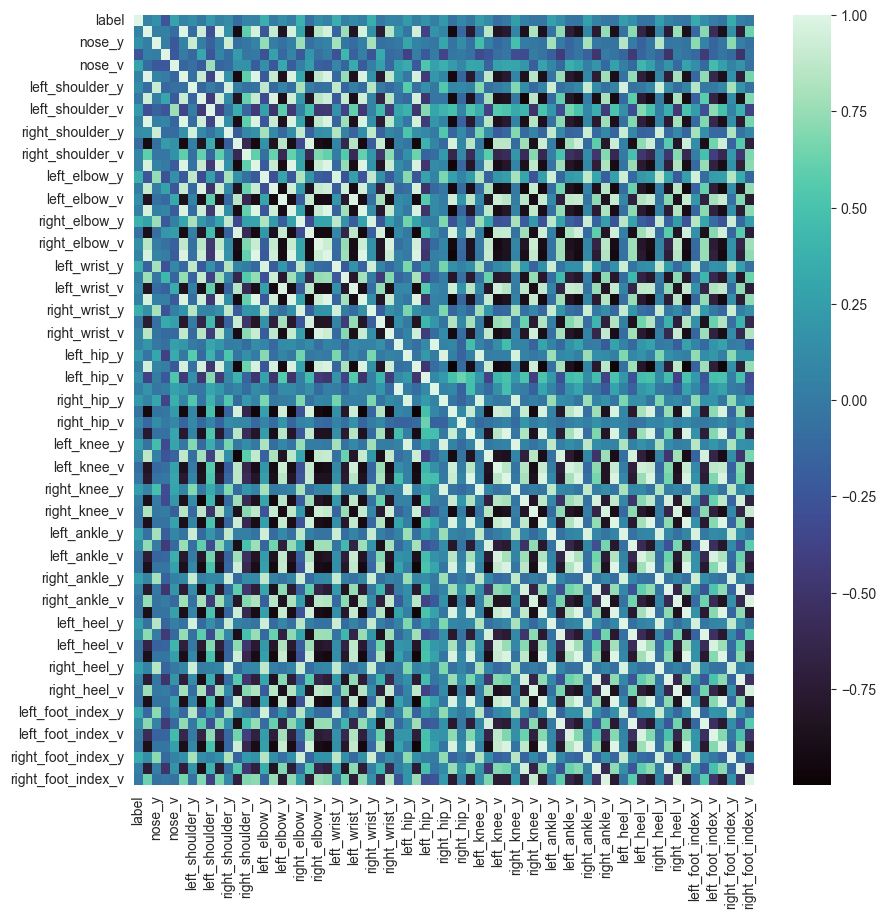

In [7]:
# replacing "H" and "L" values of "label" in the dataset to 0 and "C" values to 1

ds['label'] = ds['label'].replace('H', 0)
ds['label'] = ds['label'].replace('L', 0)
ds['label'] = ds['label'].replace('C', 1)

cm = ds.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako")
plt.show()

In [ ]:
ds["label"].value_counts()

<Axes: xlabel='label', ylabel='Count'>

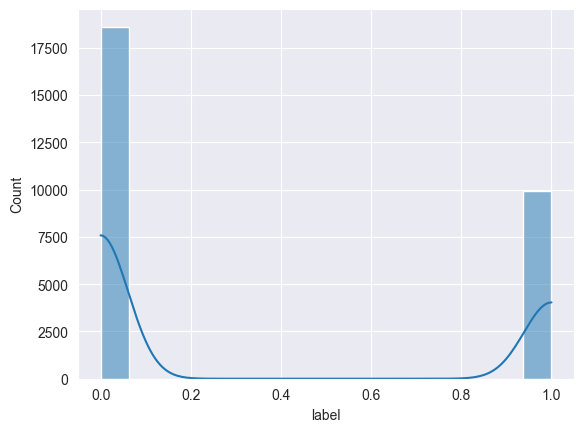

In [8]:
sns.histplot(ds["label"], kde=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

In [ ]:
y_pred = log_model.predict(ds_test.loc[:, ds_test.columns != 'label'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(ds_test['label'], y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(ds_test['label'], y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ds_test['label'], y_pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression())
])

pipe.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

y_pred_scale = pipe.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_scale)
cm = confusion_matrix(ds_test['label'], y_pred_scale)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [ ]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": np.abs(pipe.named_steps["logistic"].coef_[0])}
).sort_values(by="coef", ascending=True)

ax.barh(feature_importances["column"], feature_importances["coef"])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logistic__C": [0.1, 1, 10, 100, 1000],
    "logistic__penalty": ["l1", "l2"]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

